In [3]:
import scipy.stats as s
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class unnormalizedDist:
    def __init__(self):
        """Predefine parameters for normals"""
        self.var2 = 6
        self.mu2  =0.5
        self.mu = 7
        self.var = 2
      
        
    def pdf(self,x):
        """Evaluate unnormalized pdf"""
        g = self.unnorm_gaus2(x)
        n = self.unnorm_gauss(x)
        c = self.unnorm_cauchy(x)
        return g+n+c
    
    def unnorm_gauss(self,x):
        """Unnormalized Gaussian"""
        return np.exp((-1/(2*self.var))*(x-self.mu)**2)
    
    def unnorm_gaus2(self,x):
        """Unnormalized Gaussian"""
        return np.exp((-1/(2*self.var2))*(x-self.mu2)**2)
    
    def unnorm_cauchy(self,x):
        """Unnormalized Cauchy"""
        return (1/(1+x**2))

In [5]:
x= np.arange(-30,50,0.2) 

In [6]:
p = unnormalizedDist()

norm = s.norm(1.5,5)#Freeze our trial distribution as a normal mean 1.5, var 5 
k=28#Our Multiplier to envelope unnormalized distributed

For this method, need something proportional to our target distribution, and a probability distribution which we can use to 'envelope' the target distribution. The multiplier k is the applied to our sampling distribution, to ensure it envelopes the unnormalised distribution

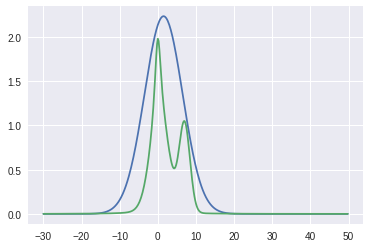

In [7]:
plt.plot(x,norm.pdf(x)*k) #envelope distribution
plt.plot(x,p.pdf(x)) #Unnormalized distribution

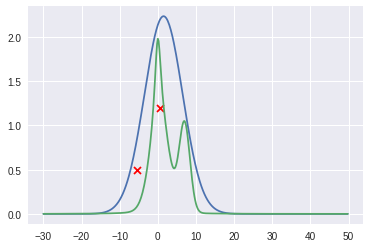

In [8]:
z0 = 0.5
u0 = 1.2
z1=-5.5
u1 = 0.5
plt.plot(x,norm.pdf(x)*k) #envelope distribution
plt.plot(x,p.pdf(x)) #Unnormalized distribution
plt.scatter(z0,u0, marker='x',c='r')
plt.scatter(z1,u1, marker='x',c='r')

Basic intuition of rejection sampling is to randomly draw points under our sampling distribution, accepting only those that also fall under our target distribution. So in the above figure, the leftmost sample is rejected as it does not fall under the target distribution, whilst the other is accepted

In [9]:

xp = np.random.random(10000)
z = norm.ppf(xp)
u = np.random.uniform(low=0,high=k*norm.pdf(z))
samples = z[np.where(p.pdf(z)>=u)]
print("Number of accepted samples:", len(samples))

Number of accepted samples: 4572


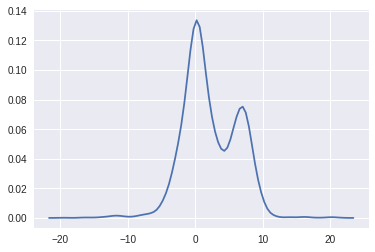

In [10]:
sns.kdeplot(samples)

So we have been able to sample from an arbitary and non-analytic distribution. The only problem is efficiency - nearly 50% of the samples were rejected in this case.